# K-Means Clustering

Group countries based on their GDP and Refugee Counts to identify clusters of similarity.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load Dataset
combined_df = pd.read_csv('combined.csv')

# Step 1: Data Preparation - Select relevant columns and drop missing values
clustering_data = combined_df[['gdp', 'total_refugees']].dropna()

In [3]:
# Step 2: Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

In [4]:
# Step 3: Apply K-Means Clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clustering_data['cluster'] = kmeans.fit_predict(scaled_data)

# Add the cluster labels back to the original dataset
combined_df.loc[clustering_data.index, 'cluster'] = clustering_data['cluster']

In [5]:
# Step 4: Analyze Cluster Statistics
cluster_summary = clustering_data.groupby('cluster').agg({
    'gdp': ['mean', 'median', 'min', 'max'],
    'total_refugees': ['mean', 'median', 'min', 'max'],
    'cluster': 'count'
}).rename(columns={'cluster': 'count'})

# Flatten MultiIndex columns
cluster_summary.columns = ['_'.join(col).strip() for col in cluster_summary.columns.values]

# Rename for clarity
cluster_summary.rename(columns={'cluster_count': 'country_count'}, inplace=True)

# Display Summary
print("\nCluster Analysis Summary:")
print(cluster_summary)


Cluster Analysis Summary:
             gdp_mean    gdp_median       gdp_min       gdp_max  \
cluster                                                           
0        1.402335e+12  1.243016e+12  1.216041e+11  3.965801e+12   
1        1.716628e+13  1.625397e+13  1.058193e+13  2.772071e+13   
2        4.035979e+12  4.004608e+12  3.537784e+12  4.525704e+12   

         total_refugees_mean  total_refugees_median  total_refugees_min  \
cluster                                                                   
0               6.577451e+04                35415.0                  15   
1               7.102665e+04                63492.0               20598   
2               1.354170e+06              1100567.0              906835   

         total_refugees_max  count_count  
cluster                                   
0                    413442          199  
1                    155551           23  
2                   2454276            8  


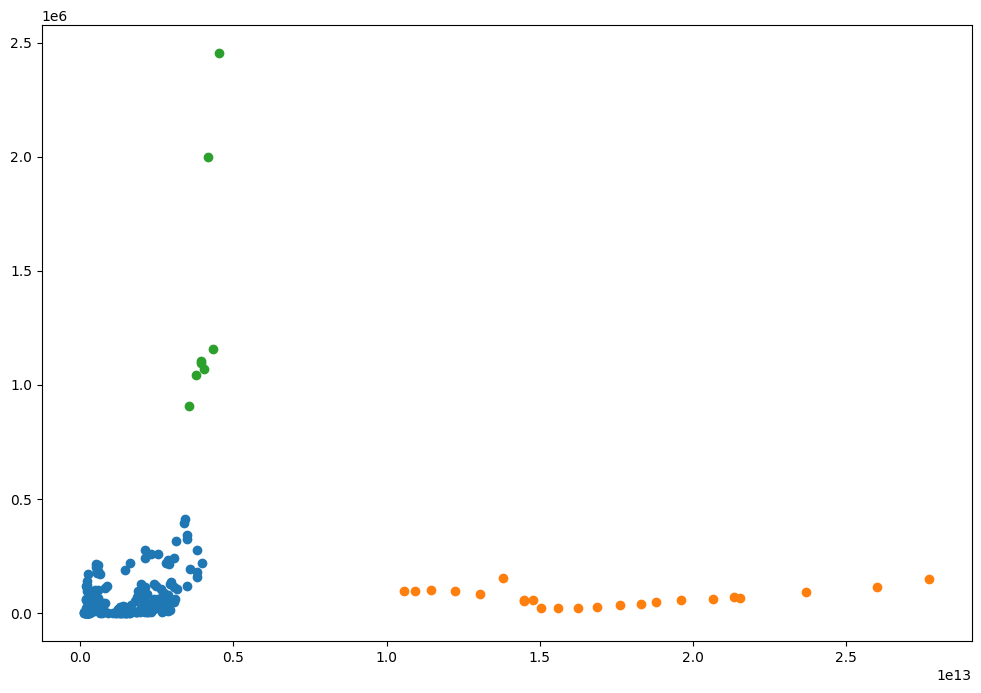

In [6]:
# Step 5: Visualize Clusters
plt.figure(figsize=(12, 8))
for cluster in range(3):
    cluster_data = clustering_data[clustering_data['cluster'] == cluster]
    plt.scatter(cluster_data['gdp'], cluster_data['total_refugees'], label=f'Cluster {cluster}')

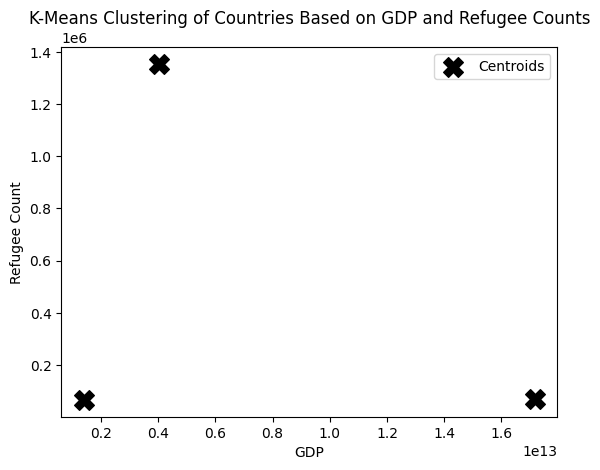

In [7]:
# Plot cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', s=200, label='Centroids')

plt.title('K-Means Clustering of Countries Based on GDP and Refugee Counts')
plt.xlabel('GDP')
plt.ylabel('Refugee Count')
plt.legend()
plt.show()